## AI기반 챗봇 및 OCR 개발 전문가 과정

### 교과목명 : 머신러닝
- 평가일 : 24. 8. 5
- 성명 :
- 점수 :

Q1. load_breast_cancer 데이터셋을 불러와서 다음을 수행하세요.
- dt로 분류모델 생성 및 모델 정확도 평가(학습:검증 = 8:2)
- 하이퍼 파라미터는 분할 기준은 지니계수, 최대 깊이는 3으로 설정
- 결정트리를 시각화


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# print("cancer.keys():\n", cancer.keys())
load_breast_cancer().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# stratify는 훈련/테스트 데이터들이 원래의 input dataset의 클래스의 비율과 같은 비율을 가지도록 할 것인지 지정
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, \
                                                 stratify=cancer.target, random_state=150)
# dt_tree = DecisionTreeClassifier()
dt_tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt_tree.fit(X_train,y_train)
pred = dt_tree.predict(X_test)

accuracy = accuracy_score(y_test,pred)
# 훈련데이터 예측정확도
print(f'정확도: {round(accuracy,2)}')

정확도: 0.89


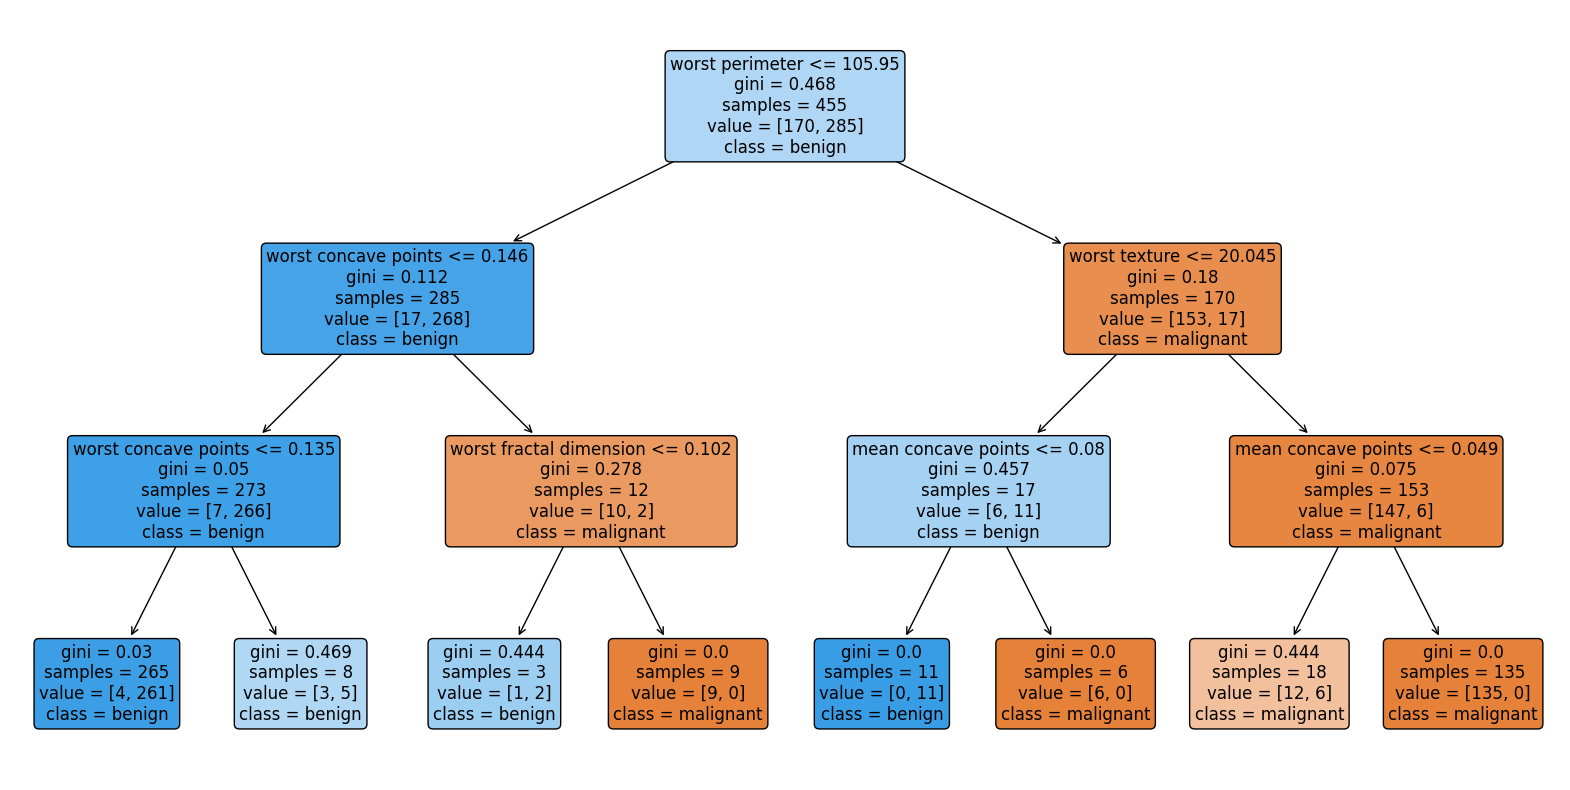

In [ ]:
# 시각화
from sklearn import tree
import matplotlib.pyplot as plt

dt_tree = DecisionTreeClassifier(max_depth=3)
dt_tree.fit(X_train,y_train)
pred = dt_tree.predict(X_test)
plt.figure(figsize=(20,10))
tree.plot_tree(dt_tree, filled=True,
              feature_names=cancer.feature_names,
              class_names=cancer.target_names,
              rounded=True, fontsize=12)
plt.show()
plt.close()

Q2. 와인 데이터에 대해서 아래 사항을 고려하여 모델 생성 및 성능개선을 위한 하이퍼파라미터 튜닝을 수행한 후 테스트 데이터로 평가하세요.
- dt를 알고리즘으로 적용
- cv = 5
- param_grid = {'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 3, 4]}

In [ ]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 와인 데이터 불러오기
wine = datasets.load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121,stratify=y)

# 하이퍼파라미터 그리드 설정
param_grid = {'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 3, 4]}

# DecisionTreeClassifier 모델 생성
dtc = DecisionTreeClassifier(random_state=1)

# GridSearchCV 객체 생성
grid_search = GridSearchCV(dtc, param_grid, cv=5)

# 모델 학습 및 교차검증
grid_search.fit(X_train, y_train)

# 결과 출력
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_search.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

Best parameters:  {'max_depth': 4, 'min_samples_split': 2}
Best cross-validation score:  0.9076354679802956
테스트 데이터 세트 정확도: 0.8889


Q3. 보스톤 주택가격 데이터셋에 대하여 규제 선형 모델인 릿지, 라쏘, 엘라스틱넷 모델로 교차검증을 수행하고 아래 각 모델의 알파값의 변화에 따른 회귀계수의 변화를 출력하세요. (단, 사용자 함수를 작성하여 수행)
- ridge_alphas = [0, 0.1, 1, 10, 100]
- lasso_alphas = [0.07,0.1,0.5,1,3]
- elastic_alphas = [0.07,0.1,0.5,1,3], L1:L2 = 0.7:0.3

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
boston = fetch_openml(name="Boston", version=1, parser='auto')
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# 필요한 feature이면 dtype 변환
for col in boston_df.columns:
  if boston_df[col].dtype.name == 'category':
    # category 타입을 먼저 수치형으로 변환 -> 범주형 데이터는 모델에 직접 사용할 수 없기 때문에 수치형으로 변환
    boston_df[col] = boston_df[col].cat.codes
    # 데이터 타입을 float로 변경
    boston_df[col] = boston_df[col].astype(float)

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
import numpy as np

def get_linear_reg_eval(model_name,params=None,X_data_n=None, y_target_n=None, verbose=True):
  coeff_df = pd.DataFrame()
  if verbose : print('####### ', model_name , '#######')
  for param in params:
    if model_name == 'Ridge':model = Ridge(alpha=param)
    elif model_name == 'Lasso':model = Lasso(alpha=param)
    else : model = ElasticNet(alpha=param, l1_ratio=0.7)
    neg_mse_scores = cross_val_score(model,X_data_n,y_target_n, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print(f'alpha {param}일 때 5 폴드 세트의 평균 RMSE: {avg_rmse}')
    model.fit(X_data_n,y_target_n)
    coeff = pd.Series(data=model.coef_, index=X_data.columns)
    colname = 'alpha:'+str(param)
    coeff_df[colname] = coeff

  return coeff_df


In [ ]:
X_data = boston_df.drop(['PRICE'], axis=1,inplace=False)
y_target = boston_df['PRICE']

ridge_alphas = [0, 0.1, 1, 10, 100]
coeff_ridge_df = get_linear_reg_eval('Ridge',params=ridge_alphas, X_data_n=X_data,y_target_n=y_target)
coeff_ridge_df

#######  Ridge #######
alpha 0일 때 5 폴드 세트의 평균 RMSE: 5.716928447470748
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.699712466274319
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.6406582449119185
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.5679786906719375
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.49923590644983


,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
CRIM,-0.065053,-0.064891,-0.063989,-0.062459,-0.058398
ZN,0.042019,0.042188,0.043162,0.045368,0.049593
INDUS,-0.054296,-0.057680,-0.076297,-0.103658,-0.119831
CHAS,3.083844,3.064099,2.926289,2.241946,0.743225
NOX,-15.309381,-14.393344,-9.352364,-2.065726,-0.224029
RM,4.113720,4.118217,4.133037,3.948086,2.506996
AGE,-0.004222,-0.005011,-0.009245,-0.013267,-0.000336
DIS,-1.502090,-1.488188,-1.411882,-1.303622,-1.215504
RAD,0.097228,0.096776,0.094484,0.094287,0.099261
TAX,0.001546,0.001373,0.000422,-0.000939,-0.001055


In [ ]:
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params=lasso_alphas, X_data_n=X_data,y_target_n=y_target)
coeff_lasso_df

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.63975318642497
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.639696014167153
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.721165611229234
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.910564972979698
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.225662896892307


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CRIM,-0.060899,-0.060272,-0.047400,-0.027592,-0.000000
ZN,0.044466,0.044379,0.043056,0.043497,0.036646
INDUS,-0.100872,-0.096489,-0.065961,-0.035079,-0.000000
CHAS,1.814288,1.342789,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,4.041496,3.958515,2.765466,1.230766,0.000000
AGE,-0.014060,-0.012398,0.001813,0.018729,0.042256
DIS,-1.231606,-1.215476,-0.987331,-0.693531,-0.000000
RAD,0.073730,0.067353,0.000000,0.000000,0.000000
TAX,-0.001620,-0.001739,-0.002674,-0.003469,-0.005808


In [ ]:
# 엘라스틱넷 회귀
elastic_alphas = [0.07,0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet',params=elastic_alphas, X_data_n=X_data,y_target_n=y_target)
coeff_elastic_df

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.5903593663528115
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.580020171066973
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.5950260435420205
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.773112322207657
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.137958613436409


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CRIM,-0.060944,-0.060245,-0.049926,-0.035752,-0.000000
ZN,0.045591,0.045875,0.046041,0.045563,0.036390
INDUS,-0.105402,-0.103734,-0.090124,-0.063498,-0.000000
CHAS,1.619638,1.247154,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.817480,3.653256,2.103637,1.070492,0.000000
AGE,-0.012495,-0.010434,0.006584,0.019592,0.042696
DIS,-1.244686,-1.231931,-1.028697,-0.771315,-0.030723
RAD,0.081576,0.077310,0.000000,0.000000,0.000000
TAX,-0.001503,-0.001560,-0.002155,-0.002844,-0.005168


Q4. iris 데이터셋에 대하여 n_components=2를 적용하고 TruncatedSVD를 사용하여 추출된 2개의 component로 품종을 구분하는 것을 시각화하세요.

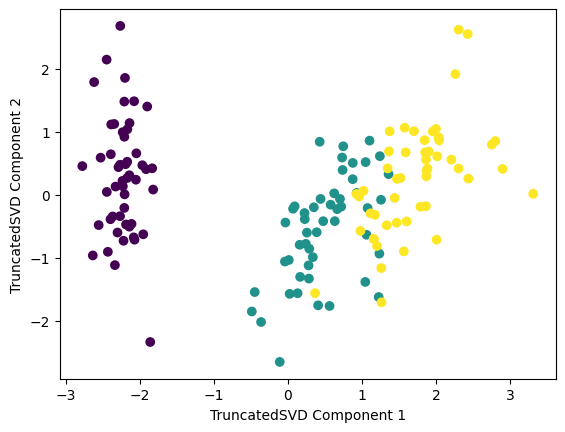

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


iris = load_iris()
iris_ftrs = iris.data

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.show()
plt.close()

Q5. iris 데이터셋의 sepal length,	sepal width,	petal length,	petal width 4개의 독립변수로 군집화를 수행 시 최적의 군집수를 산출하세요. 단, 군집개수별시뮬레이션을 시각화해서 최적의 군집수에 대한 이유도 설명

In [ ]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, n_init='auto', max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


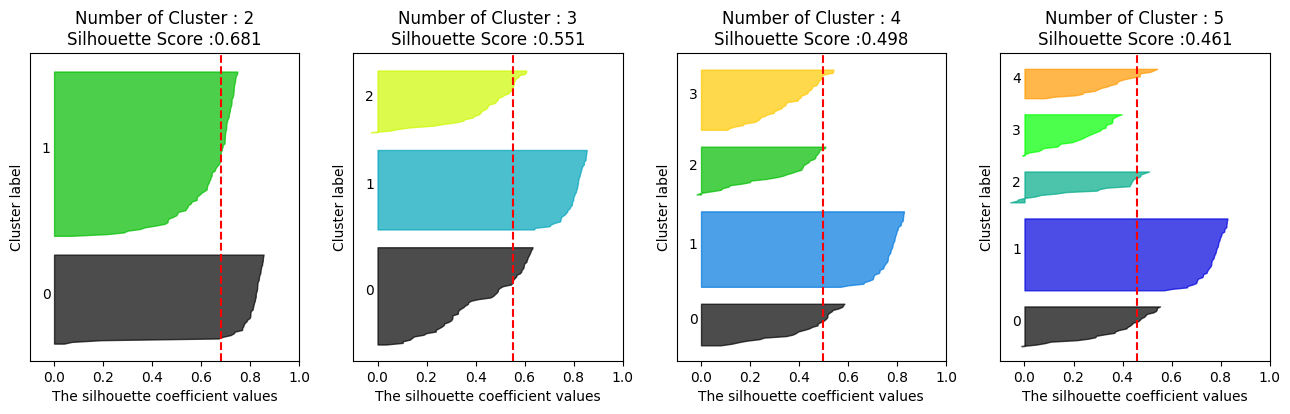

In [ ]:
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
visualize_silhouette([2,3,4,5],iris.data)

군집 개수가 2개일 때 가장 높은 실루엣 점수(0.681)를 얻고 있습니다. 이는 2개의 군집으로 나누는 것이 이 데이터에 대해 가장 최적의 군집화 방법임을 의미

최적의 군집 개수를 결정할 때는 균형(balanced clusters), 군집의 크기(size of clusters), 군집의 의미론적 타당성(semantic validity) 등 다른 요소도 고려할 수 있습니다. 이를 위해 추가적인 분석을 수행할 수 있습니다.

군집의 균형:
군집의 균형은 각 군집에 속한 데이터 포인트 수의 균형을 의미합니다. 각 군집이 너무 작거나 너무 크지 않은지 확인하는 것이 중요합니다.

군집의 크기:
각 군집의 크기를 비교하여 매우 작은 군집이 없는지 확인해야 합니다. 너무 작은 군집이 존재하면 이는 노이즈일 가능성이 있습니다.

군집의 의미론적 타당성:
군집이 의미 있는지, 즉 각 군집이 실제로 유의미한 그룹을 나타내는지 확인해야 합니다. 이는 도메인 지식이 필요할 수 있습니다.

다양한 평가 지표 사용:
다른 평가 지표도 사용할 수 있습니다. 예를 들어, 엘보우 방법(Elbow Method)이나 Davies-Bouldin Index 등을 사용할 수 있습니다.

실습과제1. 실습과제 코드를 작성하세요.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 데이터 로드
california = fetch_california_housing()
X = california.data
y = california.target

# 데이터 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 평가 사용자 함수 정의
def evaluate_model(model, X_test, y_test):
    # 예측 수행
    y_pred = model.predict(X_test)

    # MSE 계산
    mse = mean_squared_error(y_test, y_pred)

    # R^2 score 계산
    r2 = r2_score(y_test, y_pred)

    # 결과 출력
    print("테스트 데이터 MSE: ", mse)
    print("테스트 데이터 R^2: ", r2)

# 모델과 하이퍼파라미터 그리드 설정
models = [
    {
        'model': Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())]),
        'params': {
            'ridge__alpha': [0.1, 1.0, 10.0, 100.0, 200.0, 300.0]
        }
    },
    {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30]
        }
    },
    {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 10, 20]
        }
    },
    {
        'model': Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())]),
        'params': {
            'lasso__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
        }
    },
    {
        'model': Pipeline([('scaler', StandardScaler()), ('svr', SVR())]),
        'params': {
            'svr__C': [0.1, 1.0, 10.0, 100.0],
            'svr__epsilon': [0.01, 0.1, 1.0]
        }
    },
    {
        'model': Pipeline([('scaler', StandardScaler()), ('elasticnet', ElasticNet())]),
        'params': {
            'elasticnet__alpha': [0.01, 0.1, 1.0, 10.0],
            'elasticnet__l1_ratio': [0.1, 0.5, 0.9]
        }
    },
    {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    {
        'model': LGBMRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
]

best_models = []
best_scores = []

# 모든 모델에 대해 GridSearchCV 실행
for model_info in models:
    model = model_info['model']
    params = model_info['params']
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_models.append(grid_search.best_estimator_)
    best_scores.append((grid_search.best_score_, grid_search.best_params_))

# 최적의 모델 선택
best_index = np.argmax([score for score, params in best_scores])
best_model = best_models[best_index]
best_model_score = best_scores[best_index]

print(f"최적의 모델: {best_model}")
print(f"최적의 하이퍼파라미터: {best_model_score[1]}")
print(f"최적의 모델 교차 검증 점수: {best_model_score[0]}")

# 최적의 모델로 테스트 데이터 평가
evaluate_model(best_model, X_test, y_test)


최적의 모델: LGBMRegressor(max_depth=7, n_estimators=200)

최적의 하이퍼파라미터: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

최적의 모델 교차 검증 점수: -0.2137233320460452

테스트 데이터 MSE:  0.2004357006859579

테스트 데이터 R^2:  0.8470434009426402